# Feature Selection for Uplift Modeling

> In this notebook, we demonstrated how our Filter method functions are able to select important features and enhance the AUUC performance(while the results might vary among different different datasets, models and hyper-parameters)

In [28]:
import numpy as np
import pandas as pd

from causalml.dataset import make_uplift_classification
from causalml.feature_selection.filters import FilterSelect
from causalml.inference.tree import UpliftRandomForestClassifier
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.metrics import plot_gain, auuc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import logging

In [2]:
logger = logging.getLogger('causalml')
logging.basicConfig(level=logging.INFO)

## Generate dataset

In [3]:
# Generate dataset
y_name = 'conversion'
treatment_group_keys = ['control', 'treatment1']

n = 100000
n_classification_features = 50
n_classification_informative = 10
n_classification_repeated = 0
n_uplift_increase_dict = {'treatment1': 8}
n_uplift_decrease_dict = {'treatment1': 4}
delta_uplift_increase_dict = {'treatment1': 0.1}
delta_uplift_decrease_dict = {'treatment1': -0.1}

random_seed = 20200808

In [4]:
df, X_names = make_uplift_classification(
    treatment_name=treatment_group_keys,
    y_name=y_name,
    n_samples=n,
    n_classification_features=n_classification_features,
    n_classification_informative=n_classification_informative,
    n_classification_redundant=n_classification_repeated,
    n_uplift_increase_dict=n_uplift_increase_dict,
    n_uplift_decrease_dict=n_uplift_decrease_dict,
    delta_uplift_increase_dict=delta_uplift_increase_dict,
    delta_uplift_decrease_dict=delta_uplift_decrease_dict,
    random_seed=random_seed
)

In [5]:
df.head()

,treatment_group_key,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_informative,x7_informative,x8_informative,x9_informative,x10_informative,x11_irrelevant,x12_irrelevant,x13_irrelevant,x14_irrelevant,x15_irrelevant,x16_irrelevant,x17_irrelevant,x18_irrelevant,x19_irrelevant,x20_irrelevant,x21_irrelevant,x22_irrelevant,x23_irrelevant,x24_irrelevant,x25_irrelevant,x26_irrelevant,x27_irrelevant,x28_irrelevant,x29_irrelevant,x30_irrelevant,x31_irrelevant,x32_irrelevant,x33_irrelevant,x34_irrelevant,x35_irrelevant,x36_irrelevant,x37_irrelevant,x38_irrelevant,x39_irrelevant,x40_irrelevant,x41_irrelevant,x42_irrelevant,x43_irrelevant,x44_irrelevant,x45_irrelevant,x46_irrelevant,x47_irrelevant,x48_irrelevant,x49_irrelevant,x50_irrelevant,x51_uplift_increase,x52_uplift_increase,x53_uplift_increase,x54_uplift_increase,x55_uplift_increase,x56_uplift_increase,x57_uplift_increase,x58_uplift_increase,x59_increase_mix,x60_uplift_decrease,x61_uplift_decrease,x62_uplift_decrease,x63_uplift_decrease,conversion,treatment_effect
0,control,0.653960,-0.217603,1.856916,-0.075662,0.080971,-0.338374,-1.011470,0.528000,0.115418,2.110001,-0.105880,-1.174830,-1.131802,-1.238938,-0.212463,0.658225,0.802898,-1.051181,1.142571,0.707415,0.171540,1.421183,0.930434,0.598201,-0.357148,0.938157,2.026063,1.130069,2.386003,-1.375798,-0.753445,1.550080,-0.965103,0.291420,-1.594981,-1.042488,0.012180,0.851613,0.064528,1.532970,-0.967017,-0.840277,-0.035649,1.087222,-0.695348,0.426589,2.344632,0.067788,1.121798,0.004920,-0.484874,2.904009,0.707779,-0.891381,1.798687,1.533832,-2.183001,1.839608,0.755302,1.835047,-0.458431,-1.927525,2.765331,0,0
1,control,3.439658,0.477855,-0.377658,-1.317121,0.861815,-0.393180,0.503727,2.323846,1.229948,-1.784206,-0.461244,1.439393,1.545995,0.225487,1.328231,0.406225,0.528826,2.372250,-0.740586,0.463274,-0.299798,0.731866,0.050336,0.531505,1.771145,-0.566216,-1.320550,-0.263762,1.439486,-0.146589,0.707204,0.522788,0.047752,0.087582,-0.484211,-0.308298,0.067226,0.388496,0.530487,0.913853,0.301133,2.829906,0.468074,-1.133885,0.222312,-0.291281,-0.118193,-2.693967,2.033232,-0.044384,-0.894135,1.777281,3.507261,-4.705600,3.394557,-1.192333,-1.581815,2.423700,2.396904,0.296043,-1.961940,-1.444725,1.469213,1,0
2,treatment1,0.130907,-0.333536,0.474847,-0.352067,-0.024502,1.437105,0.566178,-0.232508,0.866236,0.683014,0.692335,0.804539,-1.876950,2.115281,1.207189,0.903314,-0.486676,-0.965791,0.547390,1.071554,1.336046,1.710304,-0.120889,1.234383,1.372645,-0.105120,0.560839,-0.872089,-0.830314,-0.550347,-0.712491,1.933841,-1.078271,0.431332,0.660372,2.387676,-0.842652,-0.158455,0.981805,-0.349997,0.137575,0.685520,1.228349,-0.688066,-1.229277,0.006257,0.580740,0.382705,0.865727,-1.368675,-0.259693,1.896235,-1.567531,0.169301,2.031431,-0.301982,-0.933816,0.475274,1.540994,0.698066,0.545091,-0.084405,-2.337347,1,0
3,treatment1,-2.156683,1.120198,0.174293,-1.741426,0.488993,0.638340,-0.721928,1.802134,1.097178,1.362654,-0.075147,1.903658,-1.249402,-0.928527,-1.367010,-1.037720,-0.750537,0.475712,-0.259340,-0.427594,1.022838,-0.575297,-0.285040,-0.943861,1.072523,-1.437735,0.919184,-0.418177,-1.271878,0.788641,-1.812964,0.357918,-0.984623,0.866286,0.859451,0.165953,0.920129,-0.266492,2.665905,0.304949,0.301600,-0.257073,2.127752,-1.822141,-0.522546,-0.011712,-0.127612,-0.121966,0.422870,0.597096,-4.345749,2.325112,-0.189357,0.339263,2.160481,-2.129098,-1.183581,0.000318,1.105735,-0.629281,-0.737041,-1.525081,1.416042,0,0
4,control,-2.708572,-0.799698,-2.199595,0.574077,0.083142,-0.389140,1.492101,1.725202,1.194315,0.858541,-0.056252,-1.180134,1.566415,-0.360203,0.090497,0.316002,0.164071,1.237494,1.392108,-1.166865,-0.951839,1.900253,2.177715,-0.368506,-0.148081,2.044768,-1.503735,-0.376710,1.468960,-0.226760,-1.289253,-0.552462,-0.790459,-1.276878,0.410927,1.165293,-1.058295,0.720322,-1.693052,0.278074,-1.554157,-0.293194,0.900958,0.595429,-0.197335,-0.771438,0.713106,0.510351,1.928908,-0.766387,-1.537022,2.230791,4

In [7]:
# Look at the conversion rate and sample size in each group
df.pivot_table(values='conversion',
               index='treatment_group_key',
               aggfunc=[np.mean, np.size],
               margins=True)

,mean,size
,conversion,conversion
treatment_group_key,,
control,0.499050,100000
treatment1,0.599680,100000
All,0.549365,200000


In [8]:
X_names

['x1_informative',
 'x2_informative',
 'x3_informative',
 'x4_informative',
 'x5_informative',
 'x6_informative',
 'x7_informative',
 'x8_informative',
 'x9_informative',
 'x10_informative',
 'x11_irrelevant',
 'x12_irrelevant',
 'x13_irrelevant',
 'x14_irrelevant',
 'x15_irrelevant',
 'x16_irrelevant',
 'x17_irrelevant',
 'x18_irrelevant',
 'x19_irrelevant',
 'x20_irrelevant',
 'x21_irrelevant',
 'x22_irrelevant',
 'x23_irrelevant',
 'x24_irrelevant',
 'x25_irrelevant',
 'x26_irrelevant',
 'x27_irrelevant',
 'x28_irrelevant',
 'x29_irrelevant',
 'x30_irrelevant',
 'x31_irrelevant',
 'x32_irrelevant',
 'x33_irrelevant',
 'x34_irrelevant',
 'x35_irrelevant',
 'x36_irrelevant',
 'x37_irrelevant',
 'x38_irrelevant',
 'x39_irrelevant',
 'x40_irrelevant',
 'x41_irrelevant',
 'x42_irrelevant',
 'x43_irrelevant',
 'x44_irrelevant',
 'x45_irrelevant',
 'x46_irrelevant',
 'x47_irrelevant',
 'x48_irrelevant',
 'x49_irrelevant',
 'x50_irrelevant',
 'x51_uplift_increase',
 'x52_uplift_increase',
 

## Feature selection with Filter Methods

In [9]:
# Feature selection with Filter methods
filter_f = FilterSelect()

In [10]:
method = 'F'
f_imp = filter_f.get_importance(df, X_names, y_name, method, treatment_group='treatment1')

print(f_imp)

      method  ...                                      misc
0   F filter  ...  df_num: 1.0, df_denom: 199996.0, order:1
0   F filter  ...  df_num: 1.0, df_denom: 199996.0, order:1
0   F filter  ...  df_num: 1.0, df_denom: 199996.0, order:1
0   F filter  ...  df_num: 1.0, df_denom: 199996.0, order:1
0   F filter  ...  df_num: 1.0, df_denom: 199996.0, order:1
..       ...  ...                                       ...
0   F filter  ...  df_num: 1.0, df_denom: 199996.0, order:1
0   F filter  ...  df_num: 1.0, df_denom: 199996.0, order:1
0   F filter  ...  df_num: 1.0, df_denom: 199996.0, order:1
0   F filter  ...  df_num: 1.0, df_denom: 199996.0, order:1
0   F filter  ...  df_num: 1.0, df_denom: 199996.0, order:1

[63 rows x 6 columns]


In [11]:
# method = LR(likelihood ratio test)
method = 'LR'
lr_imp = filter_f.get_importance(df, X_names, y_name, method, treatment_group='treatment1')

print(lr_imp)

       method              feature  ...   p_value             misc
0   LR filter  x57_uplift_increase  ...  0.000000  df: 1, order: 1
0   LR filter  x51_uplift_increase  ...  0.000000  df: 1, order: 1
0   LR filter  x54_uplift_increase  ...  0.000000  df: 1, order: 1
0   LR filter  x58_uplift_increase  ...  0.000000  df: 1, order: 1
0   LR filter       x9_informative  ...  0.000000  df: 1, order: 1
..        ...                  ...  ...       ...              ...
0   LR filter       x36_irrelevant  ...  0.960964  df: 1, order: 1
0   LR filter       x50_irrelevant  ...  0.966086  df: 1, order: 1
0   LR filter       x30_irrelevant  ...  0.975339  df: 1, order: 1
0   LR filter       x6_informative  ...  0.978420  df: 1, order: 1
0   LR filter       x5_informative  ...  0.995726  df: 1, order: 1

[63 rows x 6 columns]


In [12]:
# method = KL(KL divergence)
method = 'KL'
kl_imp = filter_f.get_importance(df, X_names, y_name, method, treatment_group='treatment1', n_bins=0)

print(kl_imp)

All-NaN slice encountered
All-NaN slice encountered


       method  ...                                  misc
0   KL filter  ...  number_of_bins: -9223372036854775807
0   KL filter  ...  number_of_bins: -9223372036854775807
0   KL filter  ...  number_of_bins: -9223372036854775807
0   KL filter  ...  number_of_bins: -9223372036854775807
0   KL filter  ...  number_of_bins: -9223372036854775807
..        ...  ...                                   ...
0   KL filter  ...  number_of_bins: -9223372036854775807
0   KL filter  ...  number_of_bins: -9223372036854775807
0   KL filter  ...  number_of_bins: -9223372036854775807
0   KL filter  ...  number_of_bins: -9223372036854775807
0   KL filter  ...  number_of_bins: -9223372036854775807

[63 rows x 6 columns]


In [13]:
# Performance evaluation
# train test split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=111)

In [14]:
# convert treatment column to 1 (treatment1) and 0 (control)
treatments = np.where((df_test['treatment_group_key'] == 'treatment1'), 1, 0)

print(treatments[:10])
print(df_test['treatment_group_key'][:10])

[1 0 0 0 0 1 0 1 1 0]
79114     treatment1
76043        control
47617        control
53169        control
175702       control
111635    treatment1
129212       control
19247     treatment1
49272     treatment1
199314       control
Name: treatment_group_key, dtype: object


In [15]:
# Uplift RandomForest Classfier
uplift_model = UpliftRandomForestClassifier(control_name='control', max_depth=8)

In [17]:
# using all features
features = X_names 
uplift_model.fit(X = df_train[features].values, 
                 treatment = df_train['treatment_group_key'].values,
                 y = df_train[y_name].values)
y_preds = uplift_model.predict(df_test[features].values)

## Select Top N Features Based on KL Filter

In [18]:
# select top N features based on KL filter
top_n = 10
top_10_features = kl_imp['feature'][:top_n]
print(top_10_features)

0    x1_informative
0    x48_irrelevant
0    x35_irrelevant
0    x36_irrelevant
0    x37_irrelevant
0    x38_irrelevant
0    x39_irrelevant
0    x40_irrelevant
0    x41_irrelevant
0    x42_irrelevant
Name: feature, dtype: object


In [19]:
top_n = 15
top_15_features = kl_imp['feature'][:top_n]
print(top_15_features)

0    x1_informative
0    x48_irrelevant
0    x35_irrelevant
0    x36_irrelevant
0    x37_irrelevant
0    x38_irrelevant
0    x39_irrelevant
0    x40_irrelevant
0    x41_irrelevant
0    x42_irrelevant
0    x43_irrelevant
0    x44_irrelevant
0    x45_irrelevant
0    x46_irrelevant
0    x47_irrelevant
Name: feature, dtype: object


In [20]:
top_n = 20
top_20_features = kl_imp['feature'][:top_n]
print(top_20_features)

0         x1_informative
0         x48_irrelevant
0         x35_irrelevant
0         x36_irrelevant
0         x37_irrelevant
0         x38_irrelevant
0         x39_irrelevant
0         x40_irrelevant
0         x41_irrelevant
0         x42_irrelevant
0         x43_irrelevant
0         x44_irrelevant
0         x45_irrelevant
0         x46_irrelevant
0         x47_irrelevant
0         x49_irrelevant
0         x33_irrelevant
0         x50_irrelevant
0    x51_uplift_increase
0    x52_uplift_increase
Name: feature, dtype: object


In [21]:
# Train the uplift model again with top N features
# using top 10 features
features = top_10_features

uplift_model.fit(X = df_train[features].values,
                 treatment = df_train['treatment_group_key'].values,
                 y = df_train[y_name].values)
y_preds_t10 = uplift_model.predict(df_test[features].values)

In [22]:
# using top 15 features
features = top_15_features

uplift_model.fit(X = df_train[features].values,
                 treatment = df_train['treatment_group_key'].values,
                 y = df_train[y_name].values)
y_preds_t15 = uplift_model.predict(df_test[features].values)

In [23]:
# using top 20 features
features = top_20_features

uplift_model.fit(X = df_train[features].values,
                 treatment = df_train['treatment_group_key'].values,
                 y = df_train[y_name].values)
y_preds_t20 = uplift_model.predict(df_test[features].values)

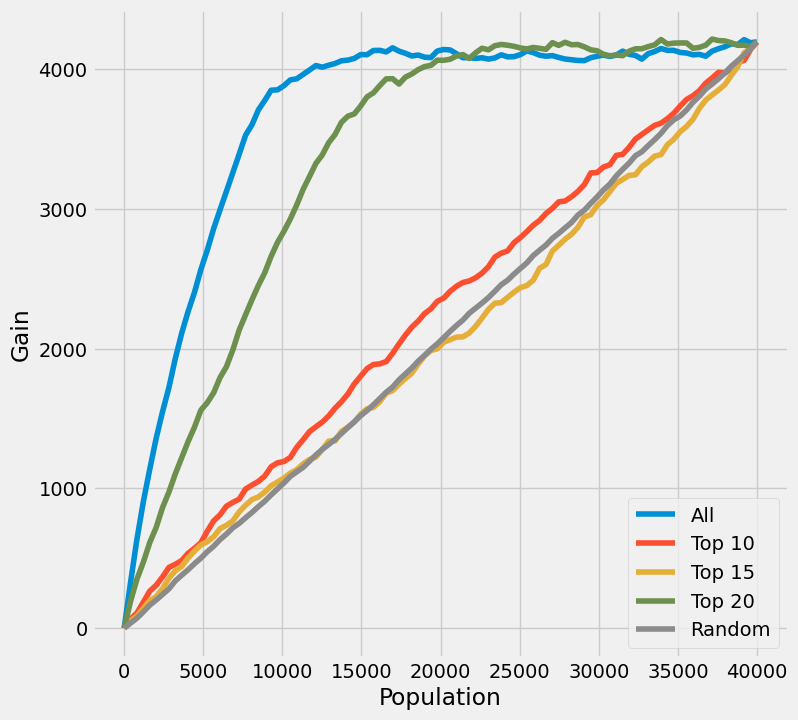

In [25]:
# print results for uplift model
df_preds = pd.DataFrame([y_preds.ravel(),
                         y_preds_t10.ravel(),
                         y_preds_t15.ravel(),
                         y_preds_t20.ravel(),
                         treatments,
                         df_test[y_name].ravel()],
                         index=['All', 'Top 10', 'Top 15', 'Top 20', 'is_treated', y_name]).T
plot_gain(df_preds, outcome_col=y_name, treatment_col='is_treated')

In [26]:
auuc_score(df_preds, outcome_col = y_name, treatment_col='is_treated')

All       0.877750
Top 10    0.532896
Top 15    0.485056
Top 20    0.802962
Random    0.493027
dtype: float64

## R Learner as base and feed in Random Forest Regressor

In [30]:
# R Learner as base and feed in Random Forest Regressor
r_rf_learner = BaseRRegressor(
    RandomForestRegressor(
        n_estimators = 100,
        max_depth = 8,
        min_samples_leaf = 100
    ),
    control_name='control'
)

In [31]:
# using all features
features = X_names
r_rf_learner.fit(X = df_train[features].values,
                 treatment=df_train['treatment_group_key'].values,
                 y = df_train[y_name].values)
y_preds = r_rf_learner.predict(df_test[features].values)

INFO:causalml:Generating propensity score
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
INFO:causalml:Calibrating propensity scores.
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for treatment1 with R-loss


In [32]:
# using top 10 features
features = top_10_features
r_rf_learner.fit(X = df_train[features].values,
                 treatment = df_train['treatment_group_key'].values,
                 y = df_train[y_name].values)
y_preds_t10 = r_rf_learner.predict(df_test[features].values)

INFO:causalml:Generating propensity score
INFO:causalml:Calibrating propensity scores.
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for treatment1 with R-loss


In [33]:
# using top 15 features
features = top_15_features
r_rf_learner.fit(X = df_train[features].values,
                 treatment = df_train['treatment_group_key'].values,
                 y = df_train[y_name].values)

INFO:causalml:Generating propensity score
INFO:causalml:Calibrating propensity scores.
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for treatment1 with R-loss


In [34]:
# using top 20 features
features = top_20_features
r_rf_learner.fit(X = df_train[features].values,
                 treatment = df_train['treatment_group_key'].values,
                 y = df_train[y_name].values)

INFO:causalml:Generating propensity score
INFO:causalml:Calibrating propensity scores.
INFO:causalml:generating out-of-fold CV outcome estimates
INFO:causalml:training the treatment effect model for treatment1 with R-loss


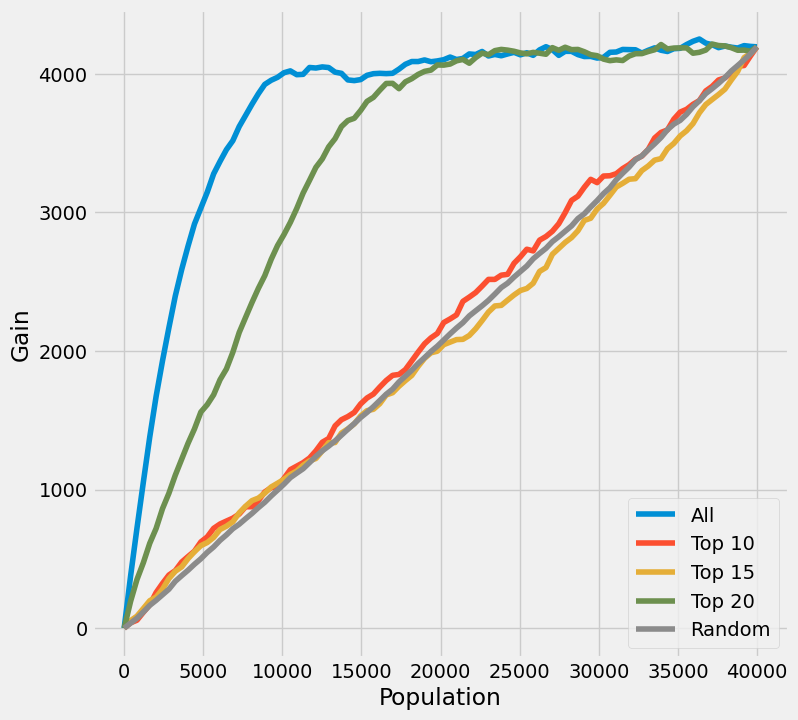

In [35]:
# print results for r learner
df_preds = pd.DataFrame([y_preds.ravel(),
                         y_preds_t10.ravel(),
                         y_preds_t15.ravel(),
                         y_preds_t20.ravel(),
                         treatments,
                         df_test[y_name].ravel()],
                         index = ['All', 'Top 10', 'Top 15', 'Top 20', 'is_treated', y_name]).T
plot_gain(df_preds, outcome_col=y_name, treatment_col='is_treated')

In [36]:
# print out AUUC score
auuc_score(df_preds, outcome_col=y_name, treatment_col='is_treated')

All       0.899163
Top 10    0.510074
Top 15    0.485056
Top 20    0.802962
Random    0.493027
dtype: float64

## S learner as base and feed in Random Forest Regressor

In [37]:
slearner_rf = BaseSRegressor(
    RandomForestRegressor(
        n_estimators = 100,
        max_depth = 8,
        min_samples_leaf = 100
    ),
    control_name = 'control'
)

In [38]:
# using all features
features = X_names
slearner_rf.fit(X = df_train[features].values,
                treatment = df_train['treatment_group_key'].values,
                y = df_train[y_name].values)
y_preds = slearner_rf.predict(df_test[features].values)

In [39]:
# using top 10 features
features = top_10_features
slearner_rf.fit(X = df_train[features].values,
                treatment = df_train['treatment_group_key'].values,
                y = df_train[y_name].values)
y_preds_t10 = slearner_rf.predict(df_test[features].values)

In [40]:
# using top 15 features
features = top_15_features
slearner_rf.fit(X = df_train[features].values,
                treatment = df_train['treatment_group_key'].values,
                y = df_train[y_name].values)
y_preds_15 = slearner_rf.predict(df_test[features].values)

In [41]:
# using top 20 features
features = top_20_features
slearner_rf.fit(X = df_train[features].values,
                treatment = df_train['treatment_group_key'].values,
                y = df_train[y_name].values)
y_preds_20 = slearner_rf.predict(df_test[features].values)

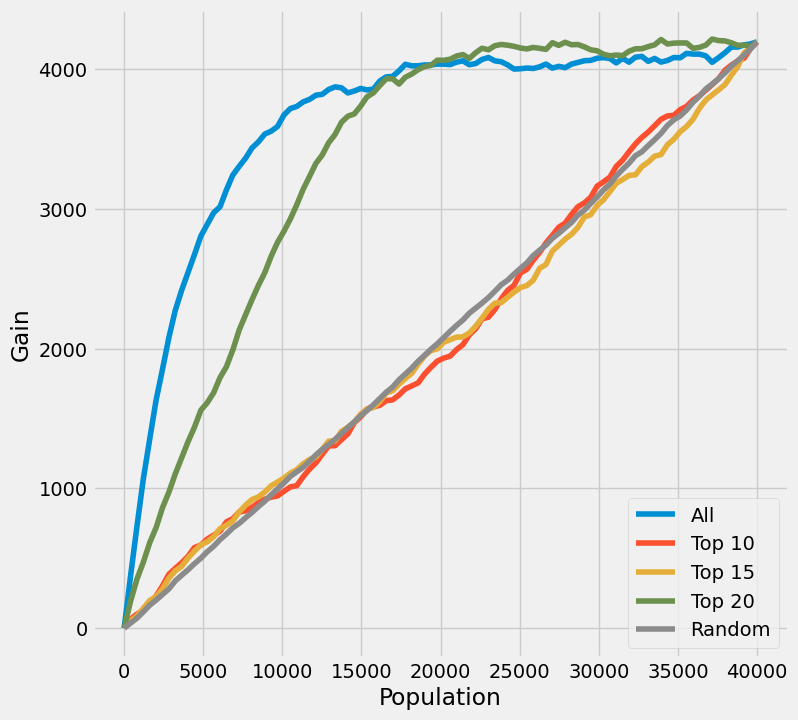

In [42]:
# print results for s learner
df_preds = pd.DataFrame([y_preds.ravel(),
                         y_preds_t10.ravel(),
                         y_preds_t15.ravel(),
                         y_preds_t20.ravel(),
                         treatments,
                         df_test[y_name].ravel()],
                         index = ['All', 'Top 10', 'Top 15', 'Top 20', 'is_treated', y_name]).T
plot_gain(df_preds, outcome_col=y_name, treatment_col='is_treated')

In [43]:
# print out AUUC score
auuc_score(df_preds, outcome_col=y_name, treatment_col='is_treated')

All       0.866137
Top 10    0.491057
Top 15    0.485056
Top 20    0.802962
Random    0.493027
dtype: float64